# Data Exploration

## Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

# check the columns and first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Explore the Data

In [2]:
# get the total counts and data types for each column
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float

In [3]:
# Get descriptions of each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# look for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", len(duplicate_rows_df))

Number of duplicates:  0


In [5]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [6]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is mode
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [7]:
# see results
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [8]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Scrub the Data

In [9]:
# analyze waterfront column
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [10]:
# values are either yes (1.0) or no (0.0)
# since the cells are blank, it is best to assume that the houses do not have a waterfront view
# the empty cells should be filled with 0.0
df['waterfront'].fillna(0, inplace=True)
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [11]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [12]:
# 0.0 is the mode
# a number equals the year the home was renovated and 0.0 means the home was never renovated
# we should then also assume that the blank cells mean that these homes were never renovated
# convert nan to 0.0
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [13]:
# see results
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# analyze view column
print(df['view'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [15]:
views_mean = df['view'].mean()
views_median = df['view'].median()
views_mode = df['view'].mode()
print('Viewed Mean: ', views_mean)
print('Viewed Median: ', views_median)
print('Viewed Mode: ', views_mode)

Viewed Mean:  0.23386272870808952
Viewed Median:  0.0
Viewed Mode:  0    0.0
dtype: float64


In [16]:
# both the median and mode are 0.0
# the mean rounded to the nearest whole number is also 0.0
# it is best to assume the cells were left blank because they were not viewed
# the blank num_views cells should be changed to 0.0
df['view'] = df['view'].fillna(0.0)
print(df['view'].value_counts())

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [17]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [18]:
# see if all null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

## EDA with Visualizations

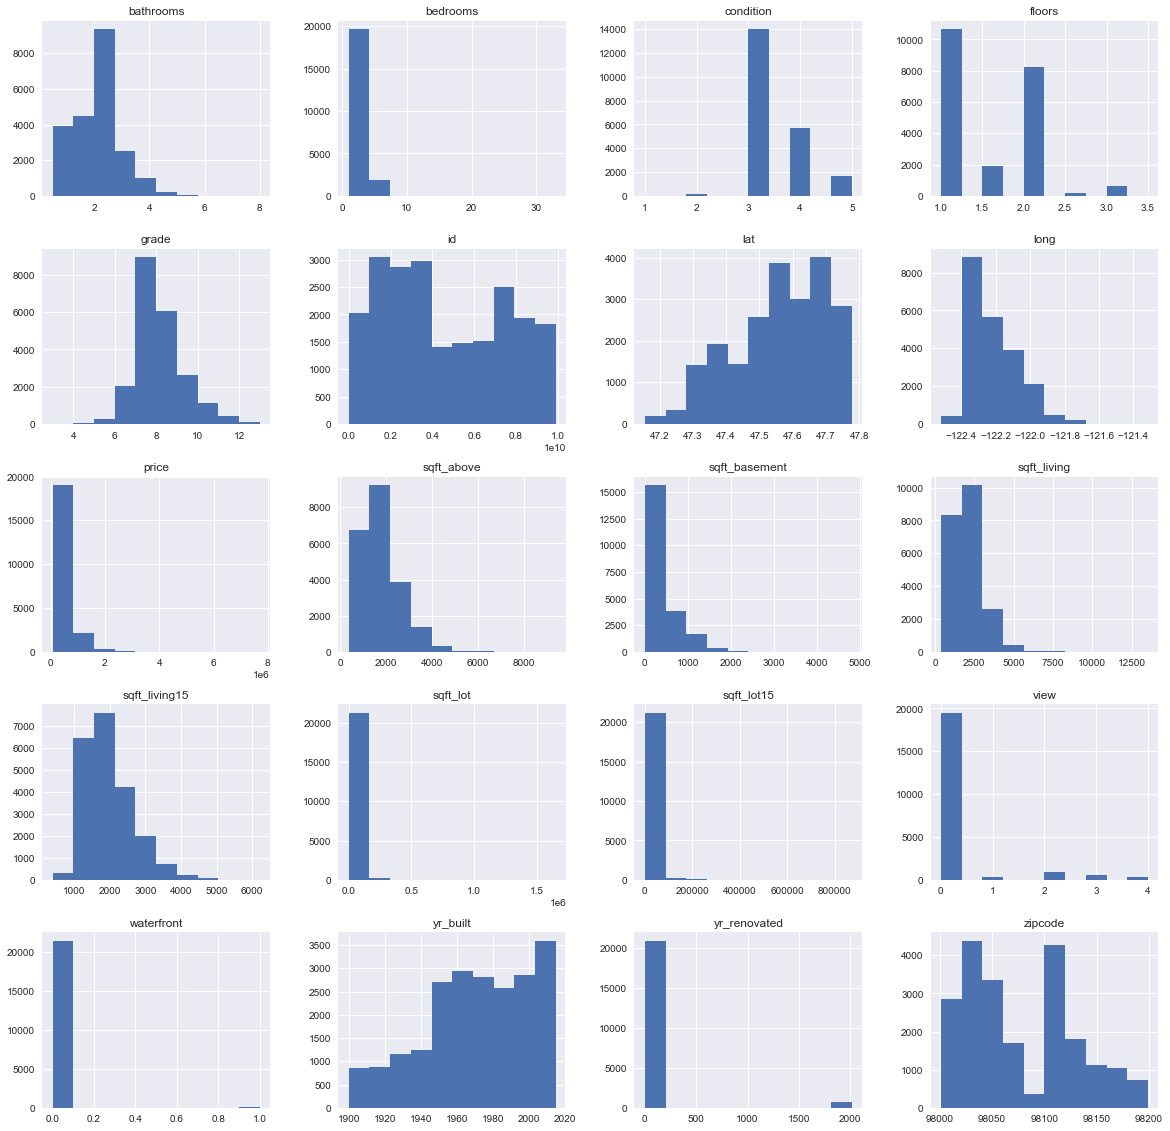

In [20]:
#look at distributions of each column
df.hist(figsize=(20,20));

## Dealing with Categorical Features

In [21]:
df.nunique() #take a look at unique values

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [22]:
drop_vars = ['id', 'date', 'zipcode']
df.drop(columns=drop_vars, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


In [23]:
cat_feats = ['grade', 'condition']
con_feats = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
             'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']

In [24]:
dummy = pd.get_dummies(df[cat_feats], drop_first=True)

In [25]:
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['grade', 'condition'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  float64
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   21597 non-null  float64
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 2.6 MB


## Removing Outliers

In [26]:
# after looking over the data, major outliers were only found in the bathrooms and bedrooms columns

### Dependant Variable - Price

In [27]:
from numpy import mean
from numpy import std

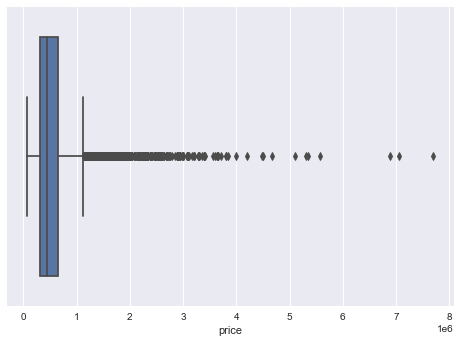

In [28]:
sns.boxplot(x=df['price'])

In [29]:
# calculate summary statistics
data_mean, data_std = mean(df.price), std(df.price)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [30]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]

In [31]:
sorted(outliers)

[1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1670000.0,
 1670000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1720000.0,
 1720000.0,
 1720000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 175

In [32]:
#subset price to eliminate outliers 
df = df[df.price < 1650000]

### Number of Bedrooms

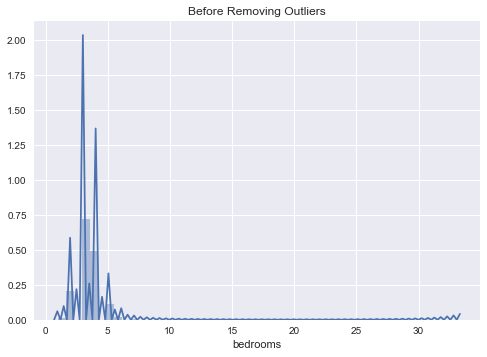

In [33]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

In [34]:
# remove outliers
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 3

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

52

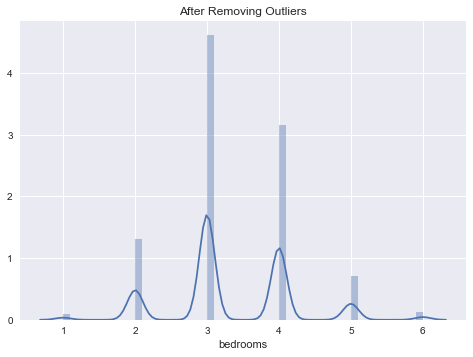

In [35]:
plt.title('After Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

### Number of Bathrooms

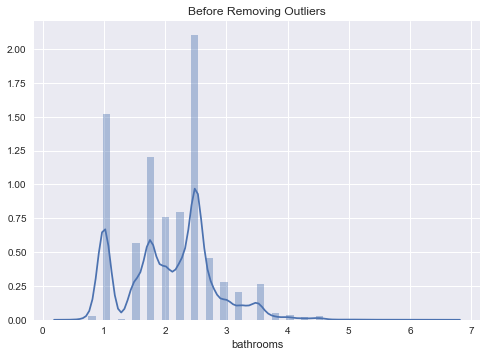

In [36]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [37]:
# remove outliers
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

99

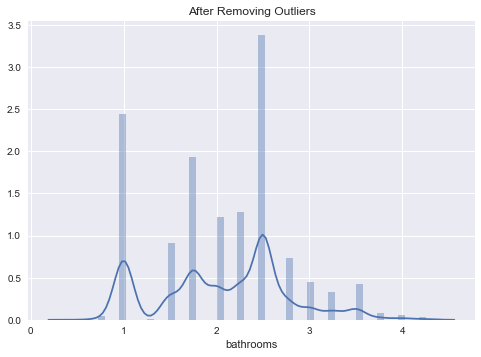

In [38]:
plt.title('After Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21040 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21040 non-null  float64
 1   bedrooms       21040 non-null  int64  
 2   bathrooms      21040 non-null  float64
 3   sqft_living    21040 non-null  int64  
 4   sqft_lot       21040 non-null  int64  
 5   floors         21040 non-null  float64
 6   waterfront     21040 non-null  float64
 7   view           21040 non-null  float64
 8   sqft_above     21040 non-null  int64  
 9   sqft_basement  21040 non-null  float64
 10  yr_built       21040 non-null  int64  
 11  yr_renovated   21040 non-null  float64
 12  lat            21040 non-null  float64
 13  long           21040 non-null  float64
 14  sqft_living15  21040 non-null  int64  
 15  sqft_lot15     21040 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 2.7 MB


In [40]:
# sqft_living equals sqft_above and sqft_basement so we will drop those columns
df = df.drop(['sqft_above', 'sqft_basement'], axis=1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.104000e+04,21040.000000,21040.000000,21040.000000,2.104000e+04,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000
mean,5.043270e+05,3.336977,2.071732,2018.100998,1.470228e+04,1.484030,0.003707,0.202139,1970.867776,64.596816,47.558777,-122.213948,1955.274952,12534.369629
std,2.565535e+05,0.862274,0.709809,816.510324,3.987405e+04,0.537846,0.060775,0.701837,29.269320,353.216035,0.139624,0.141380,648.492938,26452.178923
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.199500e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,0.000000,0.000000,1951.000000,0.000000,47.466300,-122.330000,1480.000000,5080.000000
50%,4.450000e+05,3.000000,2.250000,1890.000000,7.555000e+03,1.000000,0.000000,0.000000,1975.000000,0.000000,47.569700,-122.231000,1820.000000,7567.000000
75%,6.250000e+05,4.000000,2.500000,2490.000000,1.045550e+04,2.000000,0.000000,0.000000,1996.000000,0.000000,47.678800,-122.124000,2320.000000,9997.000000
max,1.640000e+06,6.000000,4.250000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,871200.000000


# Linear Regression

## Run A Baseline Model

In [41]:
# import libraries
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model

In [42]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
baseline = ols(formula=f, data=df).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3050.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:35:20   Log-Likelihood:            -2.8076e+05
No. Observations:               21040   AIC:                         5.615e+05
Df Residuals:                   21026   BIC:                         5.617e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.781e+07   1.15e+06    -33.003      0.000   -4.01e+07   -3.56e+07
bedrooms      -2.397e+04   1559.133    -15.375      0.000    -2.7e+04   -2.09e+04
bathrooms      4.383e+04   2535.388     17.286      0.000    3.89e+04    4.88e+04
sqft_living     141.8786      2.581     54.973      0.000     136.820     146.937
sqft_lot          0.2026      0.037      5.424      0.000       0.129       0.276
floors         4.451e+04   2411.395     18.460      0.000    3.98e+04    4.92e+04
waterfront      1.95e+05   1.81e+04     10.791      0.000     1.6e+05     2.3e+05
view           4.382e+04   1652.789     26.514      0.000    4.06e+04    4.71e+04
yr_built      -1682.1336     51.066    -32.941      0.000   -1782.226   -1582.041
yr_renovated     17.9539      3.073      5.842      0.000      11.930      23.977
lat             5.94e+05   7749.307     76.646      0.000    5.79e+05    6.09e+05
long           -1.05e+05   8761.311    -11.980      0.000   -1.22e+05   -8.78e+04
sqft_living15    93.5842      2.574     36.357      0.000      88.539      98.629
sqft_lot15       -0.2374      0.057     -4.171      0.000      -0.349      -0.126
==============================================================================
Omnibus:                     4655.103   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16546.574
Skew:                           1.090   Prob(JB):                         0.00
Kurtosis:                       6.758   Cond. No.                     5.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Location Variables

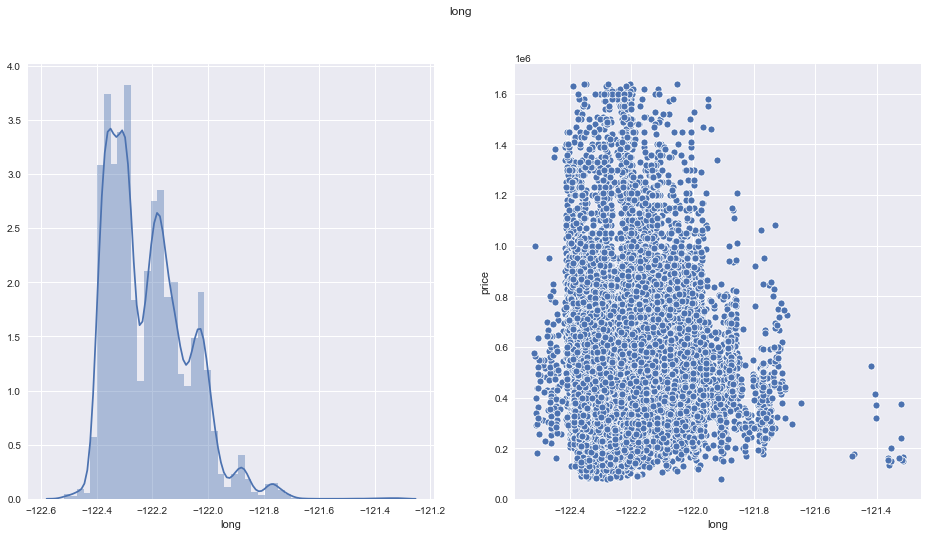

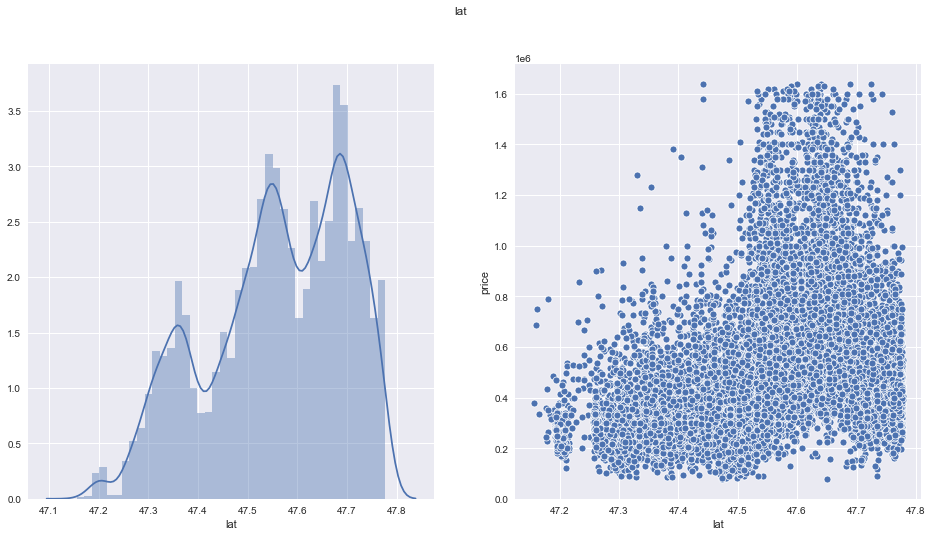

In [43]:
target = df['price'].copy()
location = df[['long', 'lat']].copy()

for col in location:
    x = location[col]
    y = target

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    sns.distplot(x)
    plt.subplot(1,2,2)

    sns.scatterplot(x, y)
    plt.suptitle(col)
    plt.tight_layout
    plt.savefig(col + '.png')

In [44]:
location.head()

,long,lat
0,-122.257,47.5112
1,-122.319,47.7210
2,-122.233,47.7379
3,-122.393,47.5208
4,-122.045,47.6168


In [45]:
location['long_lat'] = list(zip(location['long'], location['lat']))
location.head()

,long,lat,long_lat
0,-122.257,47.5112,"(-122.257, 47.5112)"
1,-122.319,47.7210,"(-122.319, 47.721000000000004)"
2,-122.233,47.7379,"(-122.23299999999999, 47.7379)"
3,-122.393,47.5208,"(-122.39299999999999, 47.5208)"
4,-122.045,47.6168,"(-122.045, 47.6168)"


In [46]:
# calculate distance from point A to Seattle using haversine
from math import radians, cos, sin, asin, sqrt

def haversine(list_long_lat, other=[-122.336283, 47.609395]):

    lon1, lat1 = list_long_lat[0], list_long_lat[1]
    lon2, lat2 = other[0], other[1]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [47]:
location['dist_to_seattle'] = location['long_lat'].apply(haversine)

In [48]:
# add bellevue to locations
location['dist_to_bellevue'] = location['long_lat'].apply(haversine, other=[-122.198985, 47.615577])

In [49]:
feat_engineer = location.loc[:,['dist_to_seattle', 'dist_to_bellevue']]

In [50]:
feat_engineer.head()

,dist_to_seattle,dist_to_bellevue
0,12.434278,12.395639
1,12.477217,14.770934
2,16.247460,13.838051
3,10.731122,17.970486
4,21.850148,11.542868


In [51]:
# drop the original lat and long columns and join the feature engineered columns
df.drop(['lat', 'long'], axis=1)
df['dist_to_seattle'] = feat_engineer['dist_to_seattle']
df['dist_to_bellevue'] = feat_engineer['dist_to_bellevue']
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,dist_to_seattle,dist_to_bellevue
count,2.104000e+04,21040.000000,21040.000000,21040.000000,2.104000e+04,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000
mean,5.043270e+05,3.336977,2.071732,2018.100998,1.470228e+04,1.484030,0.003707,0.202139,1970.867776,64.596816,47.558777,-122.213948,1955.274952,12534.369629,18.775592,17.589401
std,2.565535e+05,0.862274,0.709809,816.510324,3.987405e+04,0.537846,0.060775,0.701837,29.269320,353.216035,0.139624,0.141380,648.492938,26452.178923,10.811697,9.231464
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.355938,0.640900
25%,3.199500e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,0.000000,0.000000,1951.000000,0.000000,47.466300,-122.330000,1480.000000,5080.000000,9.839943,11.477873
50%,4.450000e+05,3.000000,2.250000,1890.000000,7.555000e+03,1.000000,0.000000,0.000000,1975.000000,0.000000,47.569700,-122.231000,1820.000000,7567.000000,16.818670,15.389140
75%,6.250000e+05,4.000000,2.500000,2490.000000,1.045550e+04,2.000000,0.000000,0.000000,1996.000000,0.000000,47.678800,-122.124000,2320.000000,9997.000000,25.703491,21.645466
max,1.640000e+06,6.000000,4.250000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,871200.000000,77.347317,67.078947


In [55]:
# try the baseline with the new columns
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'dist_to_seattle', 'dist_to_bellevue', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
baseline2 = ols(formula=f, data=df).fit()
baseline2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     3564.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:39:06   Log-Likelihood:            -2.7966e+05
No. Observations:               21040   AIC:                         5.593e+05
Df Residuals:                   21026   BIC:                         5.595e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.513e+06   9.72e+04     25.861      0.000    2.32e+06     2.7e+06
bedrooms         -2.659e+04   1480.819    -17.953      0.000   -2.95e+04   -2.37e+04
bathrooms         3.647e+04   2413.168     15.115      0.000    3.17e+04    4.12e+04
sqft_living        144.7054      2.448     59.100      0.000     139.906     149.505
sqft_lot             0.3132      0.035      8.828      0.000       0.244       0.383
floors             3.92e+04   2333.454     16.798      0.000    3.46e+04    4.38e+04
waterfront        2.054e+05   1.72e+04     11.976      0.000    1.72e+05    2.39e+05
view              4.255e+04   1576.735     26.987      0.000    3.95e+04    4.56e+04
yr_built         -1180.0020     50.714    -23.268      0.000   -1279.405   -1080.599
yr_renovated        20.5466      2.918      7.042      0.000      14.828      26.266
dist_to_seattle  -3110.8497    211.143    -14.733      0.000   -3524.705   -2696.994
dist_to_bellevue -8024.1941    225.734    -35.547      0.000   -8466.650   -7581.738
sqft_living15       83.1987      2.505     33.213      0.000      78.289      88.109
sqft_lot15           0.1147      0.054      2.118      0.034       0.009       0.221
==============================================================================
Omnibus:                     3765.252   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11619.044
Skew:                           0.926   Prob(JB):                         0.00
Kurtosis:                       6.134   Cond. No.                     4.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking Assumptions

In [56]:
# all of the columsn have a P value that is less than .05, but some of them have negative coefficient values
# let's check if there are any other issues before we run another model

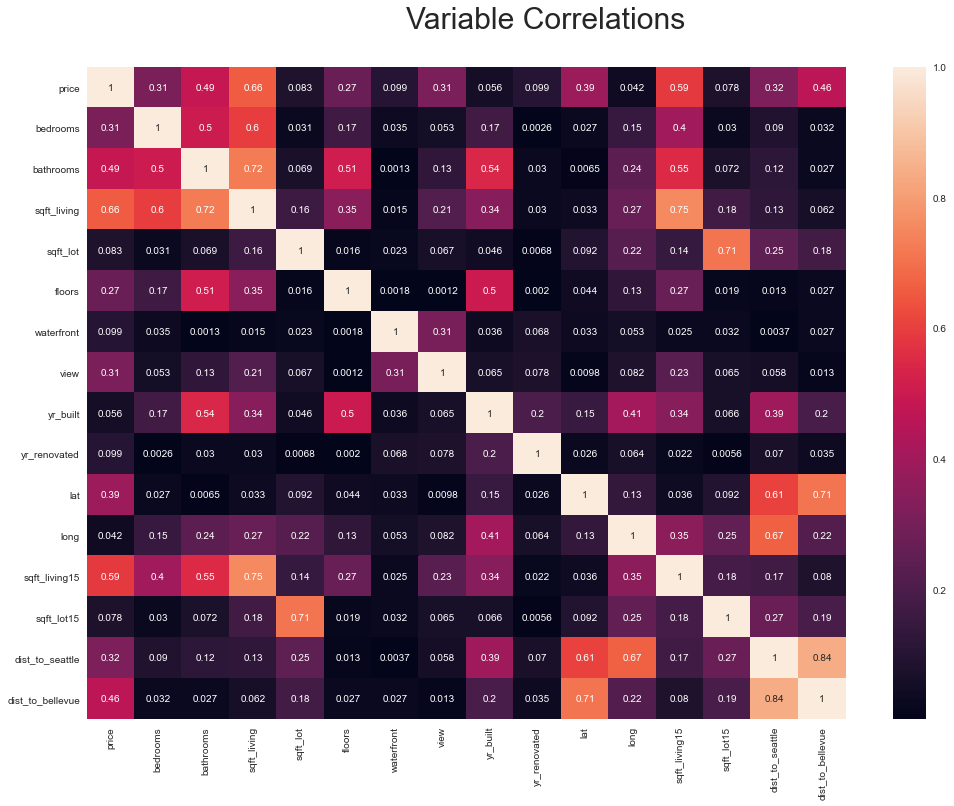

In [57]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [58]:
# the heatmap does provide much
# create functions to find any multicollinearity issues
# find the columns with the most correlations to the dependant variable
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [59]:
# usually any variables that correlate more than 80% have multicollinearity
# one of those columns will need to be dropped
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Price')
display(corr_price_df)

Multicollinear Features


,Correlations,Features
0,0.838475,"[dist_to_seattle, dist_to_bellevue]"
1,0.838475,"[dist_to_bellevue, dist_to_seattle]"


Correlations with Price


,Correlations,Features
2,0.658991,sqft_living
5,0.590026,sqft_living15
1,0.485666,bathrooms
7,0.462724,dist_to_bellevue
4,0.387991,lat
6,0.320436,dist_to_seattle
0,0.314896,bedrooms
3,0.312435,view
